In [ ]:
%pylab inline
import pandas as pd
from matplotlib import pyplot as plt
autumn()
import seaborn; seaborn.set()
from ipywidgets import interact

In [ ]:
np.random.seed(13)
n = 100
a = np.random.normal(loc=0, scale=1, size=(n, 2))
b = np.random.normal(loc=3, scale=2, size=(n, 2))

plt.figure(figsize=(8, 8))

plt.scatter(a[:, 0], a[:, 1], c='blue', s=50, alpha=0.6)
plt.scatter(b[:, 0], b[:, 1], c='red', s=50, alpha=0.6)

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['class 0', 'class 1'], loc='upper right')

In [ ]:
def get_grid(data, border=1., step=.01):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step),
                       np.arange(y_min, y_max, step))

In [ ]:
X = np.vstack([a, b])
y = np.hstack([np.zeros(n), np.ones(n)])

from sklearn.neighbors import KNeighborsClassifier as KNN
clf = KNN(n_neighbors=3)
clf.fit(X, y)

In [ ]:
xx, yy = get_grid(X)

def show_knn(k):
    plt.figure(figsize=(8, 8))
    clf = KNN(n_neighbors=k)
    clf.fit(X, y)
    predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, predicted)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='black', linewidth='1')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.axis([xx.min(), xx.max(), yy.min(), yy.max()]);

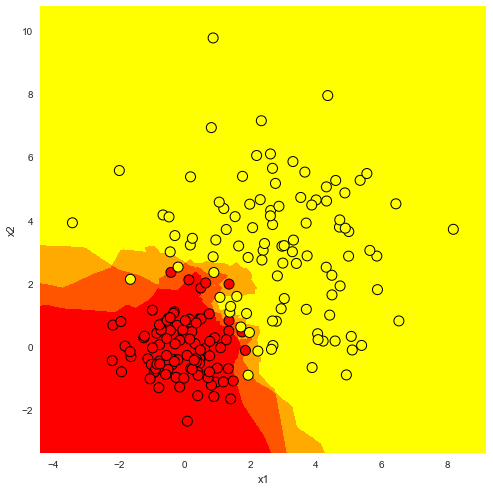

In [12]:
interact(show_knn, k=(1, 200), continuous_update=False)

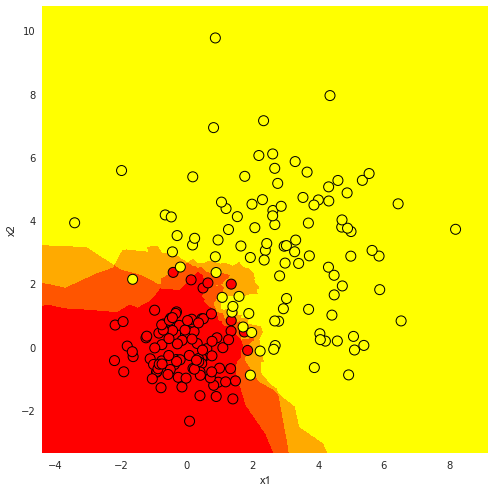

In [18]:
plt.figure(figsize=(8, 8))
xx, yy = get_grid(X)
autumn()
predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='black', linewidth='1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis([xx.min(), xx.max(), yy.min(), yy.max()]);

# Links

- https://github.com/ipython/ipywidgets